In [3]:
from skimage.util import img_as_float
from skimage.io import imread
import numpy as np
from skimage.transform import resize, rescale
from copy import copy
import pickle
import os
from skimage.color import rgb2gray, hsv2rgb
import random
import matplotlib.pyplot as plt
from brian2 import *
import pickle
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import numpy as np
import pandas as pd
import ptitprince as pt
%matplotlib inline

In [4]:
# Uncomment a file depending on what you would like to look at: Trace or Delay conditioning

# filename = 'output/delay_epigenesis.pickle'
filename = 'output/trace_epigenesis.pickle'

with open(filename, 'rb') as f:
    dump = pickle.load(f)

    
# A list of parameters you should consider pickling from the Global network in order to generate the graphs
'''
if interneurons:
  dump = [r_I.t / second, r_I.smooth_rate(width=25 * ms) / Hz, 
        r_E_sels[0].t /second, r_E_sels[0].smooth_rate(width=25 * ms) / Hz, 
        r_E_sels[1].t /second, r_E_sels[1].smooth_rate(width=25 * ms) / Hz, sp_I.t / second, 
        sp_I.i*1, sp_E_sels[0].t /second, sp_E_sels[0].i*1, 
        sp_E_sels[1].t /second, sp_E_sels[1].i*1, 
        input_mon.t/second, input_mon.i*1, trigger_mon.t/second, trigger_mon.i*1, 
        mon.t/second, mon.i*1, dopamine_monitor.t/second, dopamine_monitor.i*1, N_activity_plot, 
        synapse_stdp_monitor_out.t/second, synapse_stdp_monitor_out.s.T/gmax, synapse_stdp_monitor_out.d.T]
else:
  dump = [r_E_sels[0].t /second, r_E_sels[0].smooth_rate(width=25 * ms) / Hz, 
          r_E_sels[1].t /second, r_E_sels[1].smooth_rate(width=25 * ms) / Hz, sp_E_sels[0].t /second, sp_E_sels[0].i*1, 
          sp_E_sels[1].t /second, sp_E_sels[1].i*1, 
          input_mon.t/second, input_mon.i*1, trigger_mon.t/second, trigger_mon.i*1, 
          mon.t/second, mon.i*1, dopamine_monitor.t/second, dopamine_monitor.i*1, N_activity_plot, 
          synapse_stdp_monitor_out.t/second, synapse_stdp_monitor_out.s.T/gmax, synapse_stdp_monitor_out.d.T]
'''

flaginh = True

if 'delay' in filename:
    print('delay')
    
    ret0 = dump[0]
    rer0 = dump[1]
    ret1 = dump[2]
    rer1 = dump[3]
    spet0 = dump[4]
    spei0 = dump[5]
    spet1 = dump[6]
    spei1 = dump[7]
    inpt = dump[8]
    inpi = dump[9]
    trgt = dump[10]
    trgi = dump[11]
    mott = dump[12]
    moti = dump[13]
    dopt = dump[14]
    dopi = dump[15]
    N_activity_plot = dump[16]
    dop_t = dump[17] 
    dop_s = dump[18]
    dop_d = dump[19]
    
    flaginh = False
else:
    print('trace')
    
    rit = dump[0]
    rir = dump[1]
    ret0 = dump[2]
    rer0 = dump[3]
    ret1 = dump[4]
    rer1 = dump[5]
    spit = dump[6]
    spii = dump[7]
    spet0 = dump[8]
    spei0 = dump[9]
    spet1 = dump[10]
    spei1 = dump[11]
    inpt = dump[12]
    inpi = dump[13]
    trgt = dump[14]
    trgi = dump[15]
    mott = dump[16]
    moti = dump[17]
    dopt = dump[18]
    dopi = dump[19]
    N_activity_plot = dump[20]
    dop_t = dump[21] 
    dop_s = dump[22]
    dop_d = dump[23]


trace


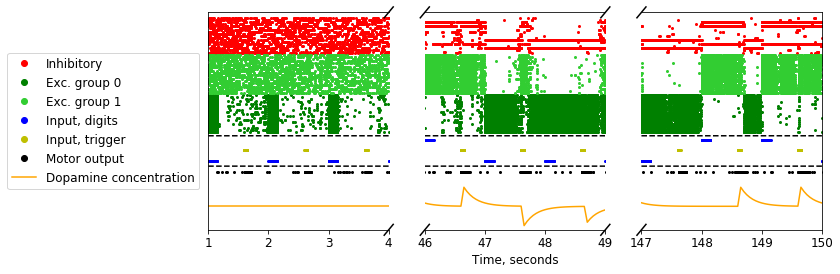

<Figure size 432x288 with 0 Axes>

In [5]:
graph_up = 15
digits = 2
lima = 330
limb = 340
size = (15, 7)
plt.rcParams.update({'font.size': 12})
f,(ax,ax2,ax3) = plt.subplots(1, 3, figsize=(11, 4),sharey=True, facecolor='w')

if flaginh:
    ax.plot(spit, spii + 2 * N_activity_plot + graph_up, 'r.', markersize=4, label='Inhibitory')
    ax2.plot(spit, spii + 2 * N_activity_plot + graph_up, 'r.', markersize=4, label='Inhibitory')
    ax3.plot(spit, spii + 2 * N_activity_plot + graph_up, 'r.', markersize=4, label='Inhibitory')

ax.plot(spet0, spei0 + graph_up, '.', color='green', markersize=4, label='Exc. group 0')
ax.plot(spet1, spei1 + N_activity_plot + graph_up, '.', color='limegreen', markersize=4, label='Exc. group 1')
ax.plot(ret0 / second, np.ones((len(ret0 / ms))) * (graph_up - 2) / (digits - 1),'--k')
ax.plot(inpt, inpi * (graph_up - 4) / (digits - 1), '.b', markersize=4, label='Input, digits')
ax.plot(trgt/second, trgi + 0.5 * (digits - 1) * (graph_up - 4), '.y', markersize=4, label='Input, trigger')
ax.plot(ret0 / second, np.zeros((len(ret0 / ms))) - 0.5 * (digits - 1) * (graph_up - 4) + 3,'--k')
ax.plot(mott, moti - 0.5 * (digits - 1) * (graph_up - 4), '.k', markersize=4, label='Motor output')
# ax.plot(dopt, dopi - (digits - 1) * graph_up, '.k', markersize=10, label='Dopamine change')
ax.plot(dop_t, dop_d[:, 0]*2000-2*graph_up+7, color='orange', markersize=4, label='Dopamine concentration')

ax2.plot(spet0, spei0 + graph_up, '.', color='green', markersize=4, label='Exc. group 0')
ax2.plot(spet1, spei1 + N_activity_plot + graph_up, '.', color='limegreen', markersize=4, label='Exc. group 1')
ax2.plot(ret0 / second, np.ones((len(ret0 / ms))) * (graph_up - 2) / (digits - 1),'--k')
ax2.plot(inpt, inpi * (graph_up - 4) / (digits - 1), '.b', markersize=4, label='Input, digits')
ax2.plot(trgt/second, trgi + 0.5 * (digits - 1) * (graph_up - 4), '.y', markersize=4, label='Input, trigger')
ax2.plot(ret0 / second, np.zeros((len(ret0 / ms))) - 0.5 * (digits - 1) * (graph_up - 4) + 3,'--k')
ax2.plot(mott, moti - 0.5 * (digits - 1) * (graph_up - 4), '.k', markersize=4, label='Motor output')
# ax2.plot(dopt, dopi - (digits - 1) * graph_up, '.k', markersize=10, label='Dopamine change')
ax2.plot(dop_t, dop_d[:, 0]*2000-2*graph_up+7, color='orange', markersize=4, label='Dopamine concentration')

ax3.plot(spet0, spei0 + graph_up, '.', color='green', markersize=4, label='Exc. group 0')
ax3.plot(spet1, spei1 + N_activity_plot + graph_up, '.', color='limegreen', markersize=4, label='Exc. group 1')
ax3.plot(ret0 / second, np.ones((len(ret0 / ms))) * (graph_up - 2) / (digits - 1),'--k')
ax3.plot(inpt, inpi * (graph_up - 4) / (digits - 1), '.b', markersize=4, label='Input, digits')
ax3.plot(trgt/second, trgi + 0.5 * (digits - 1) * (graph_up - 4), '.y', markersize=4, label='Input, trigger')
ax3.plot(ret0 / second, np.zeros((len(ret0 / ms))) - 0.5 * (digits - 1) * (graph_up - 4) + 3,'--k')
ax3.plot(mott, moti - 0.5 * (digits - 1) * (graph_up - 4), '.k', markersize=4, label='Motor output')
# ax3.plot(dopt, dopi - (digits - 1) * graph_up, '.k', markersize=10, label='Dopamine change')
ax3.plot(dop_t, dop_d[:, 0]*2000-2*graph_up+7, color='orange', markersize=4, label='Dopamine concentration')

ax.set_xlim(1, 4.0)
ax3.set_xlim(147, 150.0)
ax2.set_xlim(46, 49)
a = -35
b = 76
if not flaginh:
    b = 60

ax.set_ylim(a, b)
ax2.set_ylim(a, b)
ax3.set_ylim(a, b)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax.tick_params(
    axis='y',          
    which='both',      
    left=False,      
    right=False,       
    labelleft=False) 
ax2.tick_params(
    axis='y',          
    which='both',      
    left=False,     
    right=False,        
    labelleft=False) 
ax3.tick_params(
    axis='y',         
    which='both',    
    left=False,     
    right=False,     
    labelleft=False) 

d = .025 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs1 = dict(transform=ax.transAxes, color='k', clip_on=False)
kwargs2 = dict(transform=ax2.transAxes, color='k', clip_on=False)
kwargs3 = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs1)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs1)

ax2.plot((1-d,1+d), (-d,+d), **kwargs2)
ax2.plot((1-d,1+d),(1-d,1+d), **kwargs2)

ax2.set_xlabel('Time, seconds')
ncol=6
if flaginh:
    ncol=4
lgd = ax2.legend(bbox_to_anchor=(-1.25, 0.5, 0, 0), ncol=1, loc='right', fontsize='medium', borderaxespad=0., markerscale=3.)
kwargs2.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs2)
ax2.plot((-d,+d), (-d,+d), **kwargs2)

ax3.plot((-d,+d), (1-d,1+d), **kwargs3)
ax3.plot((-d,+d), (-d,+d), **kwargs3)

# if not flaginh:
#     if 'epi' in filename:
#         savefig('4a(new), epi.pdf', dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')
#     else:
#         savefig('4a(new).pdf', dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')
# else:
#     savefig('6a(new).pdf', dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')
show()
clf()

In [6]:
with open('delay_epigenesis.pickle', 'rb') as f:
    dump1 = pickle.load(f)
    #     ([synapse_stdp_monitor_out.t/second, synapse_stdp_monitor_out.s.T/gmax, synapse_stdp_monitor_out.d.T])
    
with open('trace_epigenesis.pickle', 'rb') as f:
    dump2 = pickle.load(f)
    #     ([synapse_stdp_monitor_out.t/second, synapse_stdp_monitor_out.s.T/gmax, synapse_stdp_monitor_out.d.T])

(0, 102)

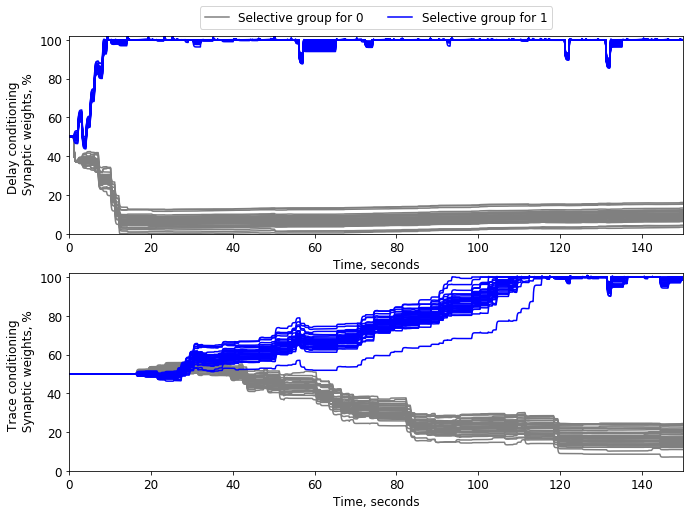

In [7]:
plt.rcParams.update({'font.size': 12})

tt = dump1[0]
s = dump1[1]*100
d = dump1[2]
figure(figsize=(11,8))
# suptitle('Synaptic epigenesis, GNW to Motor Cortex')
subplot(211)
patterns = np.arange(80)
for monitor, label in zip(np.transpose(s), patterns):
    if label < 39:
        pass
        plot(tt, monitor, color='gray')
    elif label < 40:
        plot(tt, monitor, color='gray', label='Selective group for 0')
    elif label ==40:
        plot(tt, monitor, 'b', label='Selective group for 1')
    else:
        pass
        plot(tt, monitor, 'b')
xlim(0, 150)
ylim(0, 102)
ylabel('Delay conditioning \n Synaptic weights, %')
xlabel('Time, seconds')
legend(bbox_to_anchor=(0, 1.05, 1, 0.1), ncol=4, loc='upper center', fontsize='medium', borderaxespad=0.)

tt = dump2[0]
s = dump2[1]*100
d = dump2[2]
subplot(212)
patterns = np.arange(80)
for monitor, label in zip(np.transpose(s), patterns):
    if label < 40:
        pass
        plot(tt, monitor, color='gray', label=label)
    else:
        pass
        plot(tt, monitor, 'b', label=label)

ylabel('Trace conditioning \n Synaptic weights, %')
xlabel('Time, seconds')
xlim(0, 150)
ylim(0, 102)

# savefig('4b-6b.pdf', dpi=600)

In [8]:
def pop_std(x):
    return x.std(axis=0)

data0 = pd.read_csv('output/aggregated_results_large_new.csv', index_col=0)
data00 = pd.read_csv('output/aggregated_results_additional1.csv')
data0 = pd.concat([data0, data00], ignore_index=True)
data = data0[data0['trace'] == True]

noise_inh = data[data['ratio'] == 80][data['rate_num'] == 10]['score'].to_numpy()
noise_no_inh = data[data['ratio'] == 100][data['rate_num'] == 10]['score'].to_numpy()
no_noise_no_inh = data[data['ratio'] == 100][data['rate_num'] == 0]['score'].to_numpy()
no_noise_inh = data[data['ratio'] == 80][data['rate_num'] == 0]['score'].to_numpy()

# print(data[data['ratio'] == 80][data['rate_num'] == 2])

data1 = data0[data0['trace'] == False]
inh1 = data1[data1['ratio'] == 5][data1['rate_num'] == 0]['score'].to_numpy()
inh2 = data1[data1['ratio'] == 30][data1['rate_num'] == 0]['score'].to_numpy()
inh3 = data1[data1['ratio'] == 55][data1['rate_num'] == 10]['score'].to_numpy()
inh11 = data1[data1['ratio'] == 100][data1['rate_num'] == 2]['score'].to_numpy()
inh12 = data1[data1['ratio'] == 100][data1['rate_num'] == 3]['score'].to_numpy()
inh13 = data1[data1['ratio'] == 100][data1['rate_num'] == 4]['score'].to_numpy()

datastd = data.groupby(['rate_num', 'ratio', 'trace']).std().reset_index(['rate_num', 'ratio', 'trace'])
data = data.groupby(['rate_num', 'ratio', 'trace']).mean().reset_index(['rate_num', 'ratio', 'trace'])
data1 = data1.groupby(['rate_num', 'ratio', 'trace']).mean().reset_index(['rate_num', 'ratio', 'trace'])


X = data['rate_num'].to_numpy()
Y = data['ratio'].to_numpy()
Z = data['score'].to_numpy()
var = data['var_fin'].to_numpy()
t = data['learn_time'].to_numpy()

X1 = data1['rate_num'].to_numpy()
Y1 = data1['ratio'].to_numpy()
Z1 = data1['score'].to_numpy()
var1 = data1['var_fin'].to_numpy()
t1 = data1['learn_time'].to_numpy()

Zstd = datastd['score'].to_numpy()
varstd = datastd['var_fin'].to_numpy()
tstd = datastd['learn_time'].to_numpy()


WARNING    C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
 [py.warnings]
WARNING    C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
 [py.warnings]
WARNING    C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
 [py.warnings]
WARNING    C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
 [py.warnings]
WARNING    C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

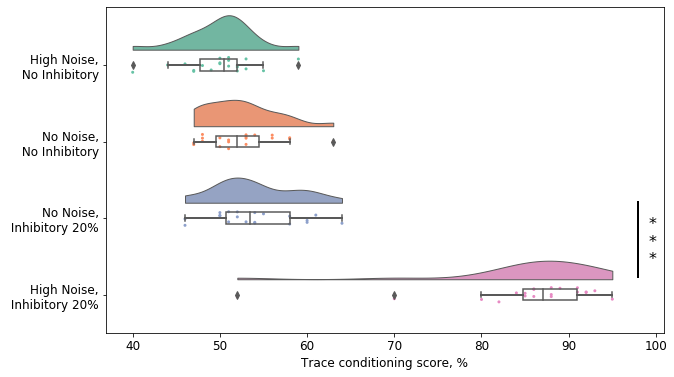

In [9]:
# Raincloud plot for trace conditioning
x = [1, 2, 3]
data0 = [noise_no_inh, no_noise_no_inh, no_noise_inh, noise_inh]
dx = ['High Noise,\n No Inhibitory', 'No Noise,\n No Inhibitory', 'No Noise,\n Inhibitory 20%', 'High Noise,\n Inhibitory 20%']

dy = 'Trace conditioning score, %'
data = np.concatenate((data0[0], data0[1]))
data = np.concatenate((data, data0[2]))
data = np.concatenate((data, data0[3]))

x = []
for i in range(len(data0)):
    for j in range(len(data0[i])):
        x.append(dx[i])

f, ax = plt.subplots(figsize=(10, 6))
ort = "h"; pal = "Set2"; sigma = .4
ax.axvline(x=98, ymax=.4, ymin=0.17, linewidth=2, color='black')

ax=pt.RainCloud(x = x, y = data, palette = pal, bw = sigma,
                 width_viol = .9, ax = ax, orient = ort)

ax.text(0.98, 0.28, '*\n*\n*', fontsize=16, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.set_xlabel(dy)
# plt.savefig('7c.pdf', dpi=600, bbox_inches='tight')
plt.show()

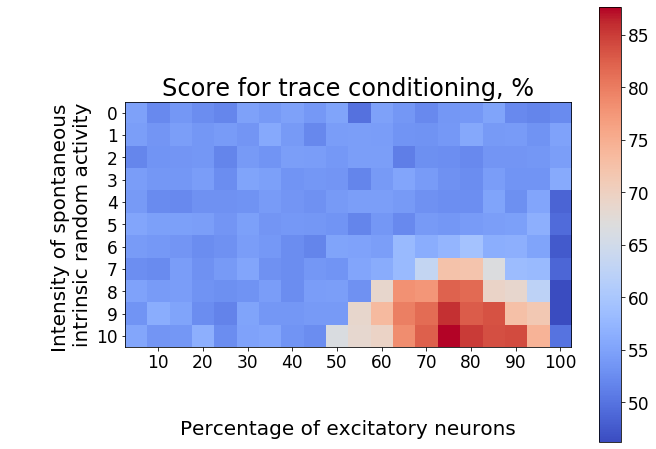

In [10]:
matplotlib.rc('xtick', labelsize=17) 
matplotlib.rc('ytick', labelsize=17) 
plt.rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.set_title('Score for trace conditioning, %')
ax.set_ylabel('\n\nIntensity of spontaneous \nintrinsic random activity')
ax.set_xlabel('\n\nPercentage of excitatory neurons')
plt.imshow(np.reshape(Z, (11, 20)), cmap=cm.coolwarm, interpolation='nearest')
Yy = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
ax.set_yticks([i for i in range(11)])
ax.set_xticks([i for i in range(20)][1::2])
ax.set_xticklabels(Yy)
plt.colorbar()
# plt.savefig('7c-heatmap.pdf', dpi=600)
plt.show()

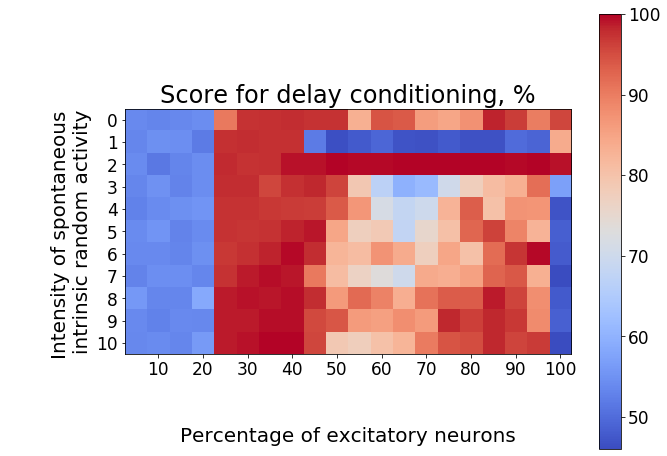

In [11]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes()
ax.set_title('Score for delay conditioning, %')
ax.set_ylabel('\n\nIntensity of spontaneous \nintrinsic random activity')
ax.set_xlabel('\n\nPercentage of excitatory neurons')
plt.imshow(np.reshape(Z1, (11, 20)), cmap=cm.coolwarm, interpolation='nearest')
Yy = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
ax.set_yticks([i for i in range(11)])
ax.set_xticks([i for i in range(20)][1::2])
ax.set_xticklabels(Yy)
plt.colorbar()
# plt.savefig('5a-heatmap.pdf', dpi=600)
plt.show()

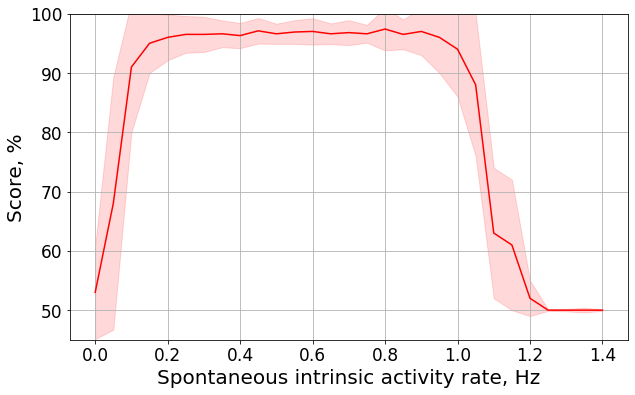

In [12]:
#Score vs Spontaneous activity for the Local network

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

x = np.linspace(0, 1.4, 29)
y = np.array([53, 68, 91, 95, 96, 96.5, 96.5, 96.6, 96.3, 97.1, 96.6, 96.9, 97., 96.6, 96.8, 96.6, 97.4, 96.5, 97, 96, 94, 88, 63, 61, 52, 50, 50, 50, 50])
std = np.array([7.86, 21.3, 11, 5, 3.85, 3.1, 2.97, 2.27, 2.12, 2.15, 1.7, 2., 2.22, 1.75, 2.1, 1.5, 3.6, 2.5, 4, 6, 8, 12, 11, 11, 3, 0.12, 0.2, 0.4, 0.12])
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r')
plt.fill_between(x, y-std, y+std, color='red', alpha=0.15)
plt.grid('on')
plt.ylabel('Score, %')
plt.xlabel('Spontaneous intrinsic activity rate, Hz')
plt.ylim(45, 100)
# plt.savefig('2c.pdf', dpi=600, bbox_inches='tight')
plt.show()